# Problem No 1 on Case Study Salary for ANOVA

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination. Conduct hypothesis test to get the inferences.


# level of significance $\alpha$ = 0.05

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import math

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df.describe(include="all")

,Education,Occupation,Salary
count,40,40,40.00
unique,3,4,nan
top,Doctorate,Prof-specialty,nan
freq,16,13,nan
mean,NaN,NaN,162186.88
std,NaN,NaN,64860.41
min,NaN,NaN,50103.00
25%,NaN,NaN,99897.50
50%,NaN,NaN,169100.00
75%,NaN,NaN,214440.75


In [6]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [7]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [8]:
correlation = df.corr()
correlation

,Salary
Salary,1.00


In [9]:
df.corr

<bound method DataFrame.corr of      Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors           

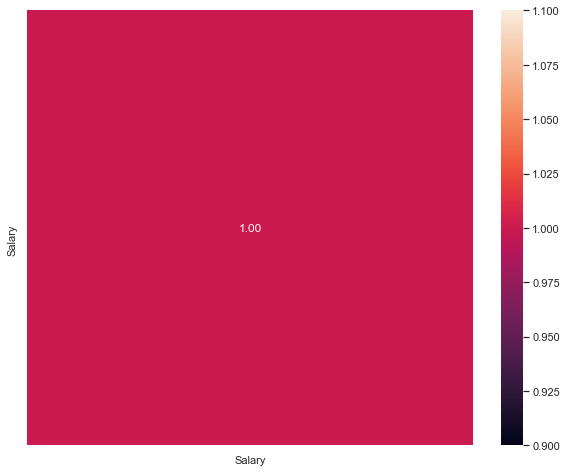

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f');

# Q1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

1. Postulate the Null and Alternate Hypothesis for Salary to Education

$H_0$: The Salary is depended on educational qualification.

$H_1$: The Salary is not depended on educational qualification.


In [11]:
df.shape

(40, 3)

In [12]:
n=df.shape[0]*df.shape[1] #total no of observations
k=df.shape[1] #no of groups

In [13]:
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 117


# Q1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

2. Perform the analysis of variances test on the dataset

In [14]:
formula = 'Salary~Education'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df          sum_sq        mean_sq     F  PR(>F)
Education  2.00 102695466735.89 51347733367.94 30.96    0.00
Residual  37.00  61372559274.49  1658717818.23   nan     nan


3. Infere the test result

Since the p value is less than the significance level, we can reject the null hupothesis and state that Salary is not depended on educational qualification

<AxesSubplot:xlabel='Education', ylabel='Salary'>

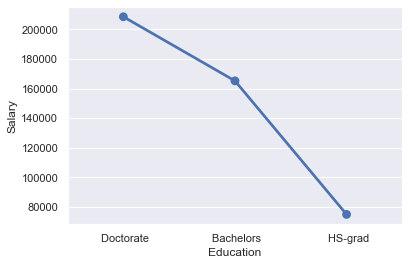

In [15]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

In [16]:
aov_table['mean_sq']

Education   51347733367.94
Residual     1658717818.23
Name: mean_sq, dtype: float64

# Q1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Postulate the Null and Alternate Hypothesis for Salary to Occupation.

$H_0$: The Salary is depended on Occupation.

$H_1$: The Salary is not depended on Occupation.


In [17]:
formula = 'Salary~Occupation'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df          sum_sq       mean_sq    F  PR(>F)
Occupation  3.00  11258782926.47 3752927642.16 0.88    0.46
Residual   36.00 152809243083.91 4244701196.78  nan     nan


Since the p value is greater than the significance level, we can accept the null hupothesis and state that Salary is depended on Occupation

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

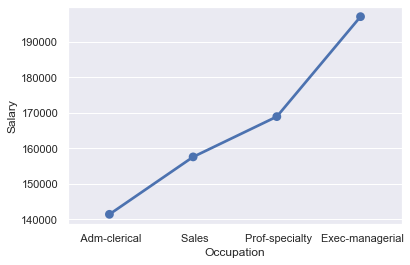

In [18]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

# Q1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [19]:
aov_table['mean_sq']

Occupation   3752927642.16
Residual     4244701196.78
Name: mean_sq, dtype: float64

Since mean_sq difference is more between Educational qualification class this means that Education class means are significantly different.






# Q1.5) What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

<AxesSubplot:xlabel='Education', ylabel='Salary'>

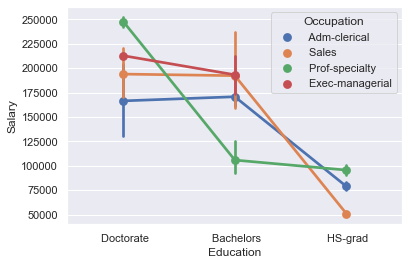

In [20]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation') 

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

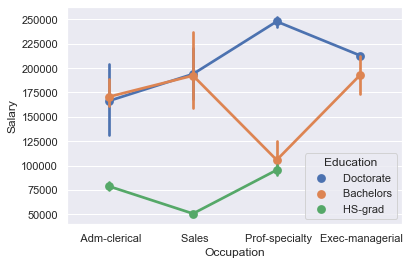

In [21]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education') 

From the above interaction plots, it seems to be little interaction between the two variables.

Adm-clerical and sales persons with bachelors and doctorate degrees earn almost similar salarypackages.

# 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

$H_0$: The Salary is depended both on Education and Occupation.

$H_1$: The Salary is not depended both on Education and Occupation.


In [22]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.00,102695466735.89,51347733367.94,31.26,0.00
C(Occupation),3.00,5519946053.36,1839982017.79,1.12,0.35
Residual,34.00,55852613221.13,1642723918.27,nan,nan


Since the p value is lesser than the significance level, we can accept the null hupothesis and state that Salary is depended both with respect to Education and Occupation

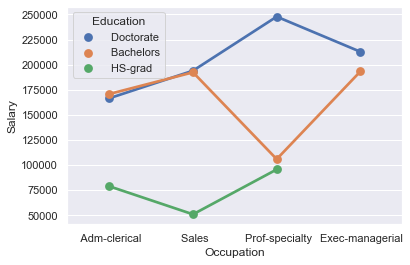

In [23]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

# Q1.7 Explain the business implications of performing ANOVA for this particular case study.

By performing the ANOVA test for Salary case study we can say that Salary is not depended on educational qualification but infact it is little dependent on Occupation.

But when considered both the class it says that Salary is moderately depended both with respect to Education and Occupation

# THE END________________________________________________________

#  Problem No 2 on EDA and PCA

The dataset Education - Post 12th Standard.csv contains information on various colleges. We are expected to do a Principal Component Analysis for this case study. 



## The Data Dictionary for the variables are given as follows :- 
1)      Names: Names of various university and colleges

2)      Apps: Number of applications received

3)      Accept: Number of applications accepted

4)      Enroll: Number of new students enrolled

5)      Top10perc: Percentage of new students from top 10% of Higher Secondary class

6)      Top25perc: Percentage of new students from top 25% of Higher Secondary class

7)      F.Undergrad: Number of full-time undergraduate students

8)      P.Undergrad: Number of part-time undergraduate students

9)      Outstate: Number of students for whom the particular college or university is Out-of-state tuition

10)   Room.Board: Cost of Room and board

11)   Books: Estimated book costs for a student

12)   Personal: Estimated personal spending for a student

13)   PhD: Percentage of faculties with Ph.D.’s

14)   Terminal: Percentage of faculties with terminal degree

15)   S.F.Ratio: Student/faculty ratio

16)   perc.alumni: Percentage of alumni who donate

17)   Expend: The Instructional expenditure per student

18)   Grad.Rate: Graduation rate


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [25]:
dff =pd.read_csv("Education+-+Post+12th+Standard.csv")

In [26]:
dff.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [27]:
dff.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.00,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.30,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.40,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.80,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.10,28,4509,99


In [28]:
print('The dataset has {} rows and {} columns'.format(dff.shape[0],dff.shape[1]))
print('\n')

The dataset has 777 rows and 18 columns




In [29]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [30]:
dff.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [31]:
dff.shape

(777, 18)

In [66]:
dff.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [32]:
dff.describe(include='all')

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
unique,777,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Grinnell College,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,NaN,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,NaN,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,NaN,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,NaN,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,NaN,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00


In [33]:
dups = dff.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

dff[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


Observations:
Dataset has 18 columns and 777 rows
The entire dataset is has 16 integer data type, 1 float and 1 object data type. 
The dataset provided is for the student who enrol in the university / college after 12th std.  
Column names Name, Accept, Enroll will be more meaningful if associated with S.F.Ratio, Grad.Rate.
No duplicate records

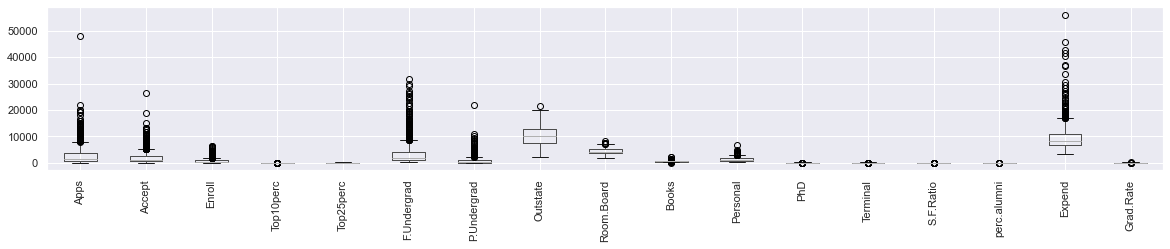

In [34]:
dff.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

Here can see that except for Top25perc column all other column has outliers

# Q2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

# Univariate Analysis

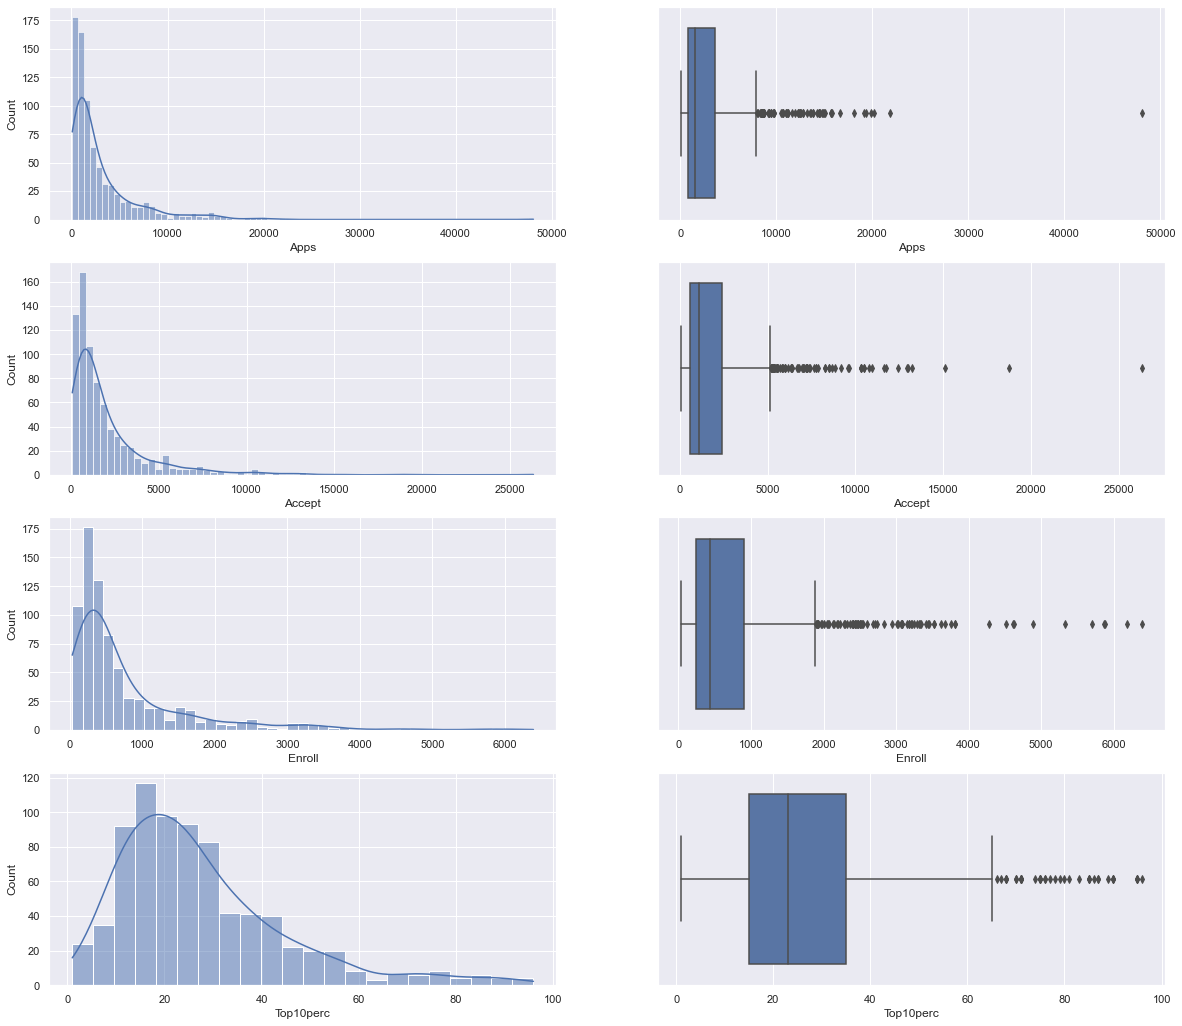

In [35]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)

sns.histplot(dff['Apps'], kde=True, ax=axes[0][0])
sns.boxplot(x='Apps', data=dff, ax=axes[0][1])

sns.histplot(dff['Accept'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Accept', data=dff , ax=axes[1][1])

sns.histplot(dff['Enroll'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Enroll', data=dff , ax=axes[2][1])

sns.histplot(dff['Top10perc'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Top10perc', data=dff ,ax=axes[3][1])

plt.show()

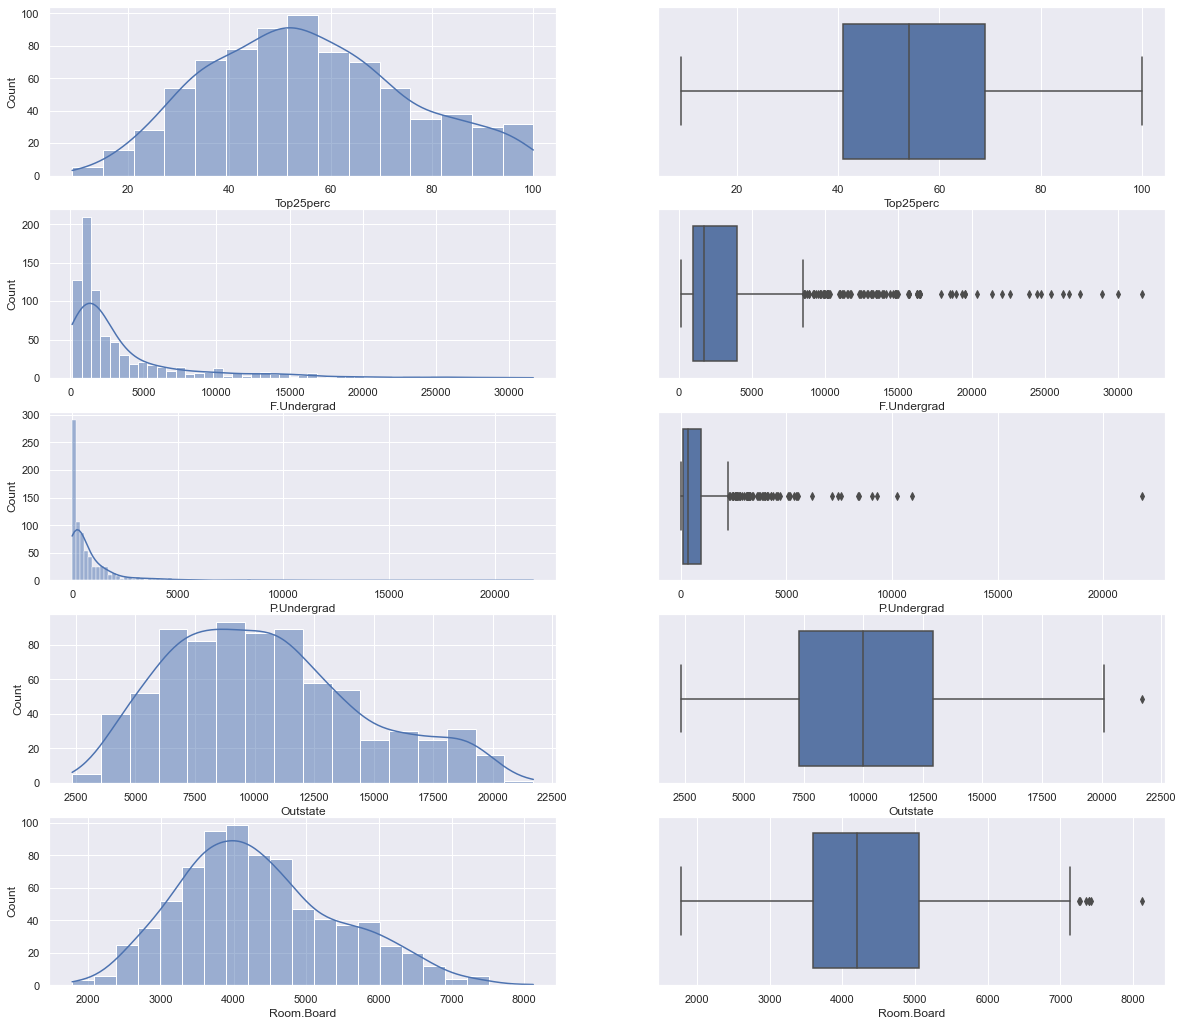

In [36]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,18)

sns.histplot(dff['Top25perc'] , kde=True, ax=axes[0][0])
sns.boxplot(x='Top25perc', data=dff, ax=axes[0][1])

sns.histplot(dff['F.Undergrad'] , kde=True, ax=axes[1][0])
sns.boxplot(x='F.Undergrad', data=dff ,ax=axes[1][1])

sns.histplot(dff['P.Undergrad'] , kde=True, ax=axes[2][0])
sns.boxplot(x='P.Undergrad', data=dff , ax=axes[2][1])

sns.histplot(dff['Outstate'] , kde=True,ax=axes[3][0])
sns.boxplot(x='Outstate', data=dff , ax=axes[3][1])

sns.histplot(dff['Room.Board'] , kde=True, ax=axes[4][0])
sns.boxplot(x='Room.Board', data=dff , ax=axes[4][1])

plt.show()

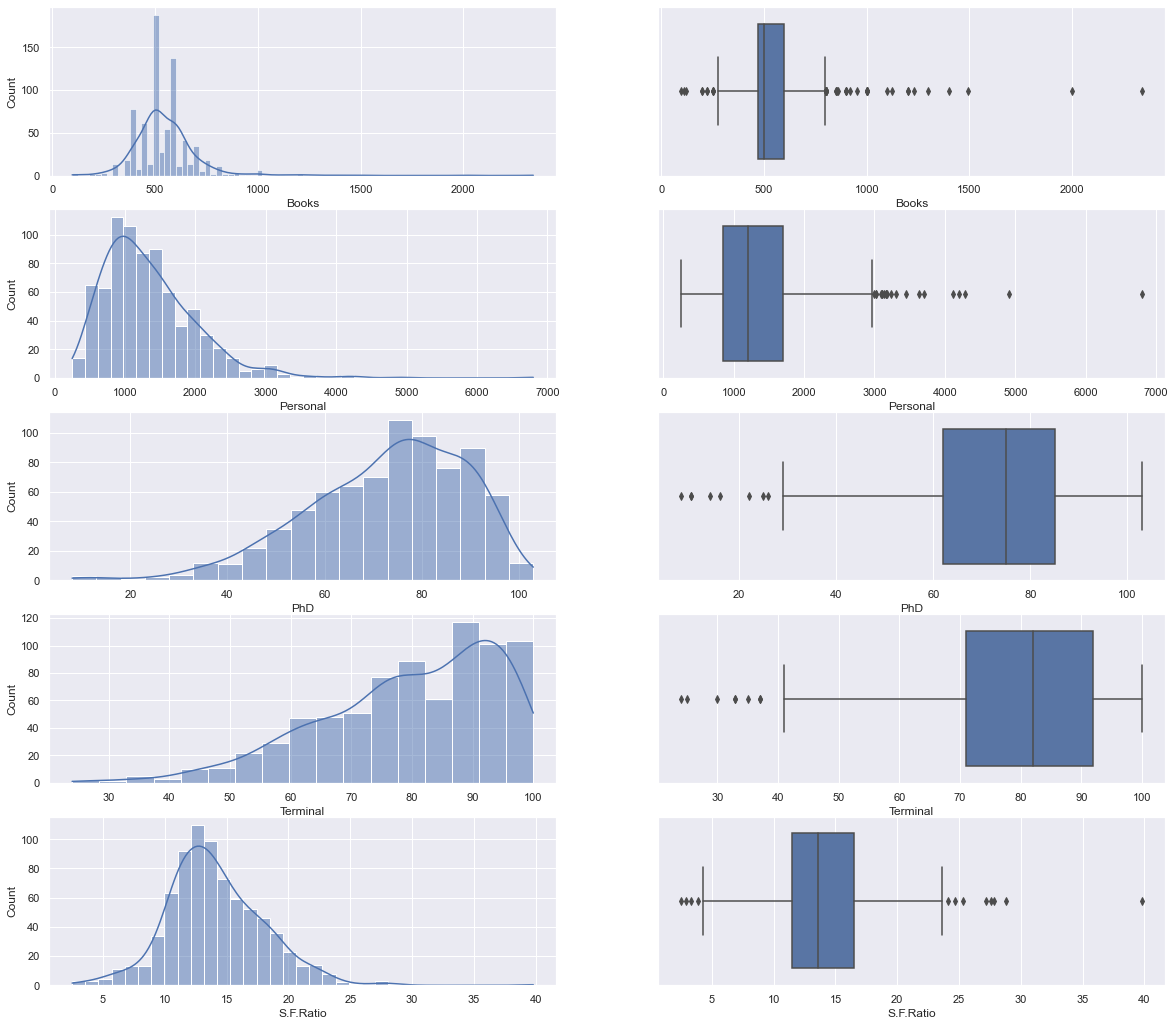

In [37]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,18)

sns.histplot(dff['Books'] , kde=True, ax=axes[0][0])
sns.boxplot(x='Books', data=dff , ax=axes[0][1])

sns.histplot(dff['Personal'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Personal', data=dff , ax=axes[1][1])

sns.histplot(dff['PhD'] , kde=True, ax=axes[2][0])
sns.boxplot(x='PhD', data=dff , ax=axes[2][1])

sns.histplot(dff['Terminal'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Terminal', data=dff , ax=axes[3][1])

sns.histplot(dff['S.F.Ratio'] , kde=True, ax=axes[4][0])
sns.boxplot(x='S.F.Ratio', data=dff , ax=axes[4][1])

plt.show()

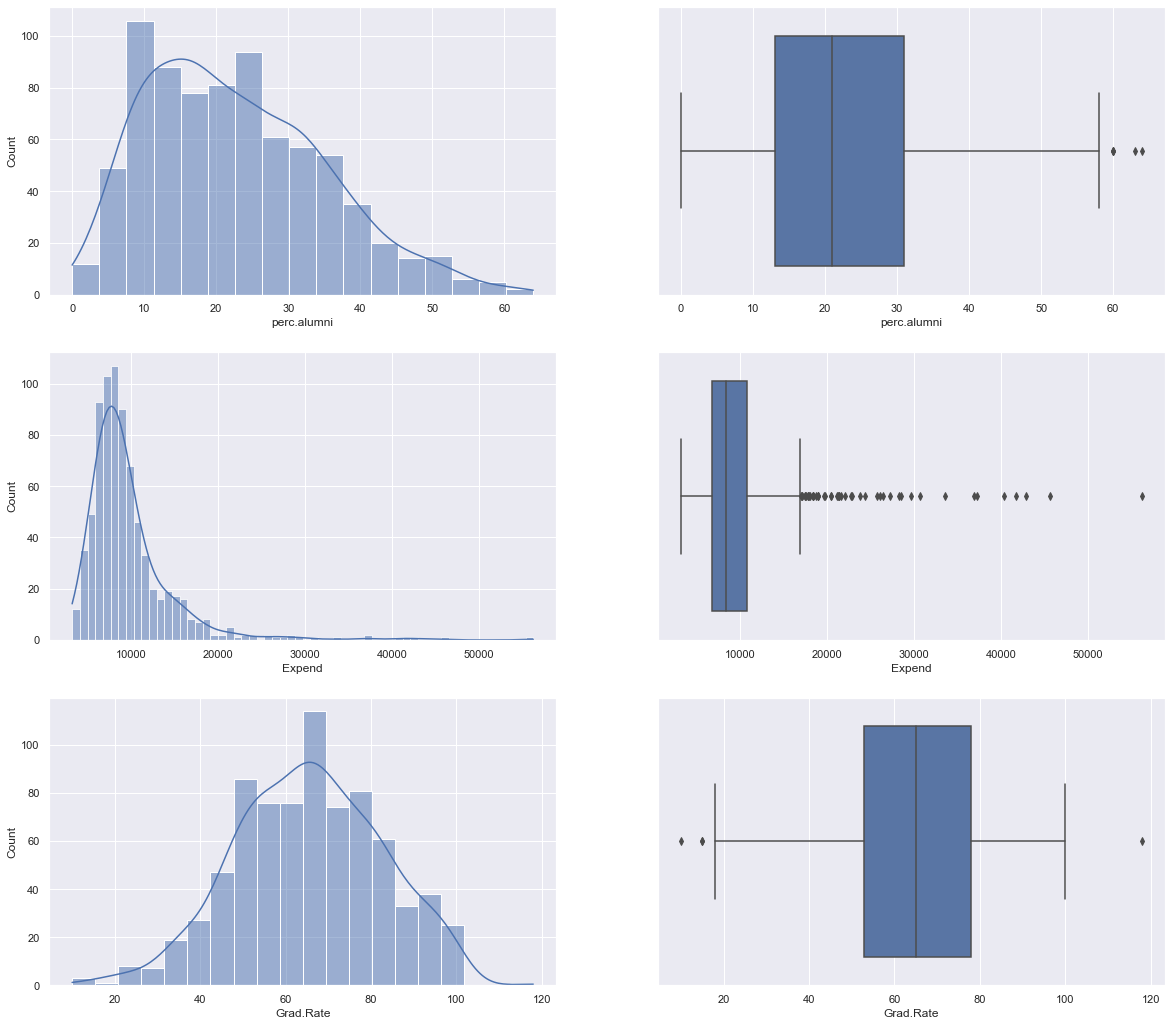

In [38]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,18)

sns.histplot(dff['perc.alumni'] , kde=True, ax=axes[0][0])
sns.boxplot(x='perc.alumni', data=dff , ax=axes[0][1])

sns.histplot(dff['Expend'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Expend', data=dff , ax=axes[1][1])

sns.histplot(dff['Grad.Rate'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Grad.Rate', data=dff , ax=axes[2][1])

plt.show()

In [39]:
dff['Names'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Abilene Christian University
1                  Adelphi University
2                      Adrian College
3                 Agnes Scott College
4           Alaska Pacific University
                    ...              
772           Worcester State College
773                 Xavier University
774    Xavier University of Louisiana
775                   Yale University
776      York College of Pennsylvania
Name: Names, Length: 777, dtype: object>

In [40]:
#Univariate Analysis on Categorical Variable
dff['Names'].value_counts(normalize=True)

Grinnell College                         0.00
Chapman University                       0.00
Adrian College                           0.00
Mount Saint Mary College                 0.00
Wesleyan University                      0.00
                                         ... 
Wofford College                          0.00
Saint Vincent College                    0.00
University of Denver                     0.00
University of Massachusetts at Amherst   0.00
Davidson College                         0.00
Name: Names, Length: 777, dtype: float64

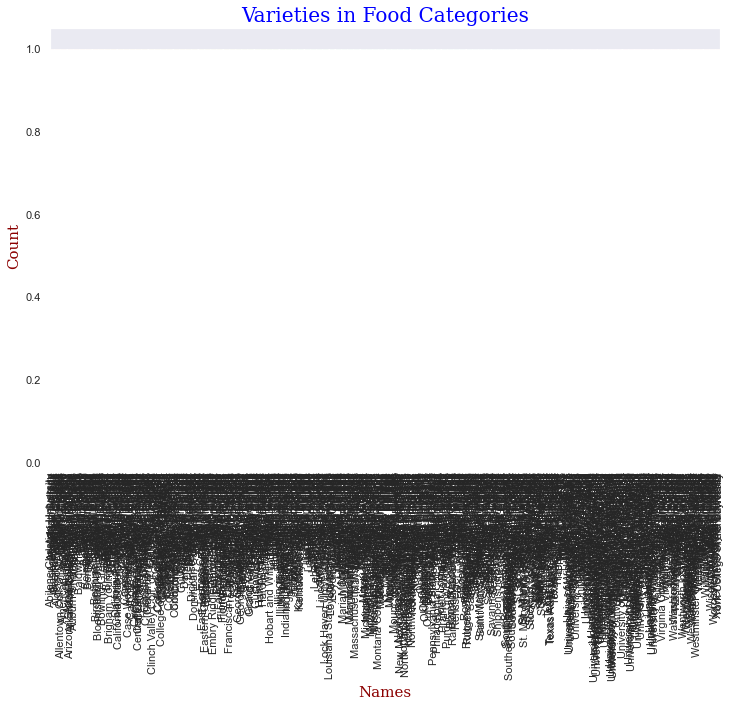

Grinnell College                          1
Chapman University                        1
Adrian College                            1
Mount Saint Mary College                  1
Wesleyan University                       1
                                         ..
Wofford College                           1
Saint Vincent College                     1
University of Denver                      1
University of Massachusetts at Amherst    1
Davidson College                          1
Name: Names, Length: 777, dtype: int64

In [67]:
plt.figure(figsize = (12,8))
sns.countplot(dff['Names'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Varieties in Food Categories",fontdict = font1)
plt.xlabel("Names",fontdict = font2)
plt.ylabel("Count",fontdict = font2)
plt.xticks(rotation=90)
plt.show()
dff['Names'].value_counts()

In [42]:
dff.skew(axis=0, skipna=True)

Apps           3.72
Accept         3.42
Enroll         2.69
Top10perc      1.41
Top25perc      0.26
F.Undergrad    2.61
P.Undergrad    5.69
Outstate       0.51
Room.Board     0.48
Books          3.49
Personal       1.74
PhD           -0.77
Terminal      -0.82
S.F.Ratio      0.67
perc.alumni    0.61
Expend         3.46
Grad.Rate     -0.11
dtype: float64

# Skweness of Data 
1) Skweness = 0 -------- Normally Distributed


2) Skweness > 0 ---------Left Skewed


3) Skweness < 0 ---------Right Skewed.


From above we can say that Top25perc and Grad.Rate is almost normally distributed.



In [43]:
#Multivariate analysis
dff.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.94,0.85,0.34,0.35,0.81,0.40,0.05,0.16,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15
Accept,0.94,1.00,0.91,0.19,0.25,0.87,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07
Enroll,0.85,0.91,1.00,0.18,0.23,0.96,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.38,0.46,0.66,0.49
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.52,-0.29,0.42,0.53,0.48
F.Undergrad,0.81,0.87,0.96,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.65,0.04,-0.30,0.38,0.41,-0.55,0.57,0.67,0.57
Room.Board,0.16,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.65,1.00,0.13,-0.20,0.33,0.37,-0.36,0.27,0.50,0.42
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00


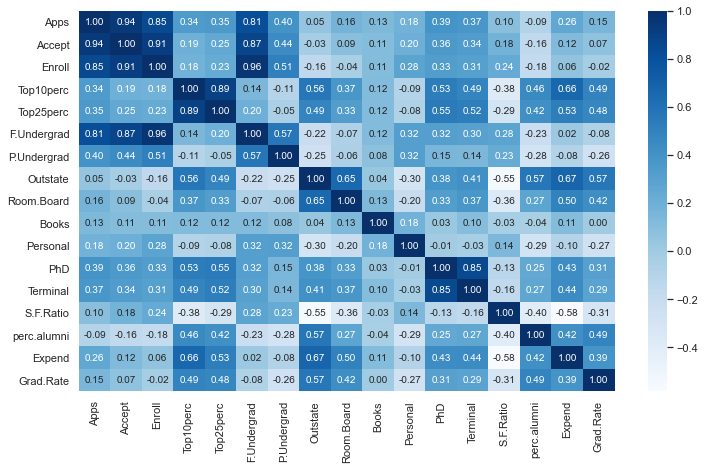

In [44]:
#Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(dff.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

# Q2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

## Yes it is necessary to do scaling for PCA in this case.

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set many variables are having values in thousands and in other just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.***Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

# Since scalling is done only on numerical values we will remove Names Column

In [45]:
dff1=dff.drop(['Names'], axis =1)
dff1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.00,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.30,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.40,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.80,49,40386,99


In [46]:
from scipy.stats import zscore
dff1_num_scaled=dff1.apply(zscore)
dff1_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.35,-0.32,-0.06,-0.26,-0.19,-0.17,-0.21,-0.75,-0.96,-0.60,1.27,-0.16,-0.12,1.01,-0.87,-0.50,-0.32
1,-0.21,-0.04,-0.29,-0.66,-1.35,-0.21,0.24,0.46,1.91,1.22,0.24,-2.68,-3.38,-0.48,-0.54,0.17,-0.55
2,-0.41,-0.38,-0.48,-0.32,-0.29,-0.55,-0.50,0.20,-0.55,-0.91,-0.26,-1.20,-0.93,-0.30,0.59,-0.18,-0.67
3,-0.67,-0.68,-0.69,1.84,1.68,-0.66,-0.52,0.63,1.00,-0.60,-0.69,1.19,1.18,-1.62,1.15,1.79,-0.38
4,-0.73,-0.76,-0.78,-0.66,-0.60,-0.71,0.01,-0.72,-0.22,1.52,0.24,0.20,-0.52,-0.55,-1.68,0.24,-2.94


# Q2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

Correlation is a scaled version of covariance; note that the two parameters always have the same sign
(positive, negative, or 0). When the sign is positive, the variables are said to be positively correlated; when the
sign is negative, the variables are said to be negatively correlated; and when the sign is 0, the variables are said
to be uncorrelated.

In simple sense correlation,measures both the strength and direction of the linear relationship between two
variables
Covariance is a measure used to determine how much two variables change in tandem. It indicates the
direction of the linear relationship between variables.

In [47]:
cov_mat=pd.DataFrame.cov(dff1_num_scaled)
cov_mat

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.94,0.85,0.34,0.35,0.82,0.40,0.05,0.17,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15
Accept,0.94,1.00,0.91,0.19,0.25,0.88,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07
Enroll,0.85,0.91,1.00,0.18,0.23,0.97,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.39,0.46,0.66,0.50
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.53,-0.30,0.42,0.53,0.48
F.Undergrad,0.82,0.88,0.97,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.66,0.04,-0.30,0.38,0.41,-0.56,0.57,0.67,0.57
Room.Board,0.17,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.66,1.00,0.13,-0.20,0.33,0.38,-0.36,0.27,0.50,0.43
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00


In [48]:
cov_matrix= np.cov(dff1_num_scaled.T)
cov_matrix

array([[ 1.00128866,  0.94466636,  0.84791332,  0.33927032,  0.35209304,
         0.81554018,  0.3987775 ,  0.05022367,  0.16515151,  0.13272942,
         0.17896117,  0.39120081,  0.36996762,  0.09575627, -0.09034216,
         0.2599265 ,  0.14694372],
       [ 0.94466636,  1.00128866,  0.91281145,  0.19269493,  0.24779465,
         0.87534985,  0.44183938, -0.02578774,  0.09101577,  0.11367165,
         0.20124767,  0.35621633,  0.3380184 ,  0.17645611, -0.16019604,
         0.12487773,  0.06739929],
       [ 0.84791332,  0.91281145,  1.00128866,  0.18152715,  0.2270373 ,
         0.96588274,  0.51372977, -0.1556777 , -0.04028353,  0.11285614,
         0.28129148,  0.33189629,  0.30867133,  0.23757707, -0.18102711,
         0.06425192, -0.02236983],
       [ 0.33927032,  0.19269493,  0.18152715,  1.00128866,  0.89314445,
         0.1414708 , -0.10549205,  0.5630552 ,  0.37195909,  0.1190116 ,
        -0.09343665,  0.53251337,  0.49176793, -0.38537048,  0.45607223,
         0.6617651 

In [49]:
dff1_num_scaled.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.94,0.85,0.34,0.35,0.81,0.40,0.05,0.16,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15
Accept,0.94,1.00,0.91,0.19,0.25,0.87,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07
Enroll,0.85,0.91,1.00,0.18,0.23,0.96,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.38,0.46,0.66,0.49
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.52,-0.29,0.42,0.53,0.48
F.Undergrad,0.81,0.87,0.96,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.65,0.04,-0.30,0.38,0.41,-0.55,0.57,0.67,0.57
Room.Board,0.16,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.65,1.00,0.13,-0.20,0.33,0.37,-0.36,0.27,0.50,0.42
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00


# Q 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

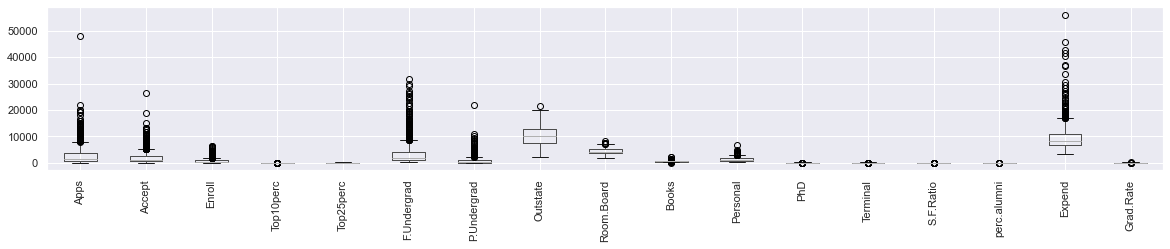

In [50]:
dff.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

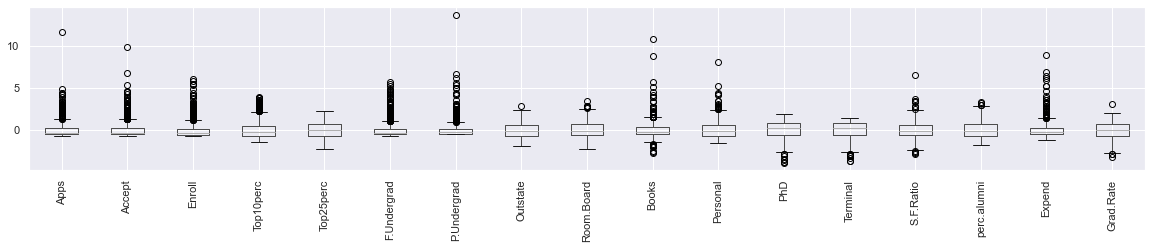

In [51]:
dff1_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

We can see that there are many changes in outliers. Here can see that except for Top25perc column all other column has outliers

# Q2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

Eigenvalue and Eigenmatrix are mainly used to capture key information that stored in a large matrix.
1. It provides summary of large matrix.
2. Performing computation on large matrix is slow and require more memory and CPU, eigenvectors and
eigenvalues can improve the efficiency in computationally intensive task by reducing dimensions after
ensuring of the key information is maintained.

In [52]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(dff1_num_scaled)

In [53]:
#Extract eigen values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [54]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

# Q2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [55]:
# Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 18 to 7)
pca = PCA(n_components=7, random_state=123)
df_pca = pca.fit_transform(dff1_num_scaled)
df_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [56]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871])

In [57]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7'],
                                    index = dff1_num_scaled.columns)

In [58]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Apps,0.25,0.33,-0.06,0.28,0.01,-0.02,-0.04
Accept,0.21,0.37,-0.10,0.27,0.06,0.01,-0.01
Enroll,0.18,0.40,-0.08,0.16,-0.06,-0.04,-0.03
Top10perc,0.35,-0.08,0.04,-0.05,-0.40,-0.05,-0.16
Top25perc,0.34,-0.04,-0.02,-0.11,-0.43,0.03,-0.12
F.Undergrad,0.15,0.42,-0.06,0.10,-0.04,-0.04,-0.03
P.Undergrad,0.03,0.32,0.14,-0.16,0.30,-0.19,0.06
Outstate,0.29,-0.25,0.05,0.13,0.22,-0.03,0.11
Room.Board,0.25,-0.14,0.15,0.18,0.56,0.16,0.21
Books,0.06,0.06,0.68,0.09,-0.13,0.64,-0.15


Scree plot: A scree plot helps the analyst visualize the relative importance of the factors, a sharp drop in
the plot signals that subsequent factors are ignorable

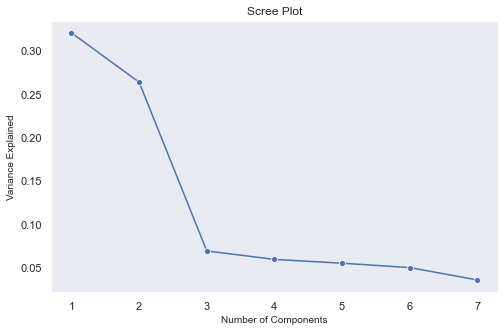

In [59]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,8),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

# Q2.7 Write down the explicit form of the first PC 

In [60]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [61]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [62]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
Apps,0.25,0.33,-0.06,0.28,0.01
Accept,0.21,0.37,-0.10,0.27,0.06
Enroll,0.18,0.40,-0.08,0.16,-0.06
Top10perc,0.35,-0.08,0.04,-0.05,-0.40
Top25perc,0.34,-0.04,-0.02,-0.11,-0.43
F.Undergrad,0.15,0.42,-0.06,0.10,-0.04
P.Undergrad,0.03,0.32,0.14,-0.16,0.30
Outstate,0.29,-0.25,0.05,0.13,0.22
Room.Board,0.25,-0.14,0.15,0.18,0.56
Books,0.06,0.06,0.68,0.09,-0.13


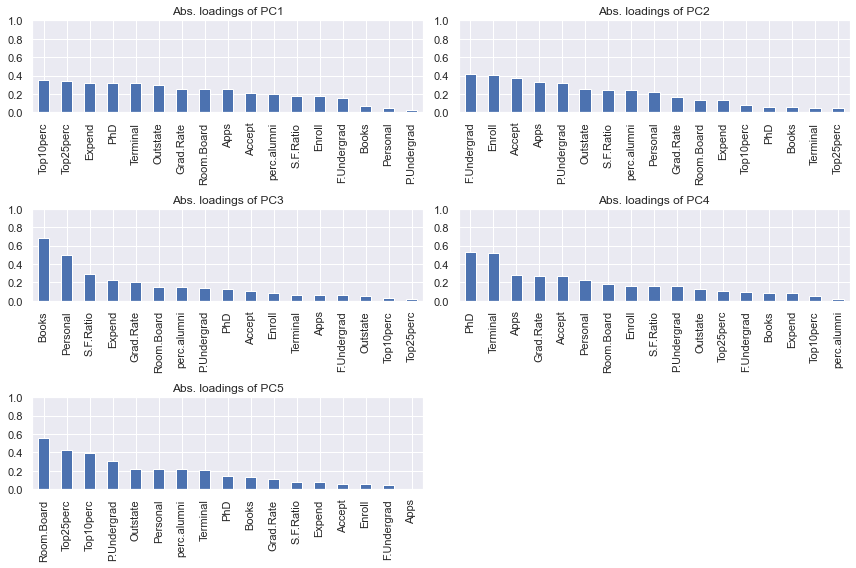

In [63]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

# Q2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

We should define the objective first for doing PCA in the first place. Are we doing it for reducing storage requirements, to reduce dimensionality for a
classification algorithm, or for some other reason.

If we don't have any strict constraints, then we should plot the cumulative sum of eigenvalues.
If we divide each value by the total sum of eigenvalues prior to plotting, then your plot will show the fraction of
total variance retained vs. number of eigenvalues. The plot will then provide a good indication of when you hit
the point of diminishing returns.

In [64]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726])

In [65]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,3))*100
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2])

The Cumulative % gives the percentage of variance accounted for by the n components. For example, the
cumulative percentage for the second component is the sum of the percentage of variance for the first and
second components. It helps in deciding the number of components by selecting the components which
explained the high variance
In the above array we see that the first feature explains 32% of the variance within our data set while the
first two explain 58.3 and so on. If we employ 7 features we capture ~ 85.2% of the variance within the
dataset.

# Q2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

1. PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of
possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce
multidimensional data to lower dimensions while retaining most of the information. Principal Component
Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while
keeping as much variation as possible.


2. This PCA can only be done on continuous variables


3. There are about 18 variables in the dataset, by applying PCA we will reduce those to just 7 components
which will capture 87.6 % variance in the dataset


# The End-------------------------------------------------------------------------